In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df = df.drop(['Invoice ID','Date','Time'],axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df['gross margin percentage'].unique()

array([4.76190476])

In [9]:
# Since only same value is there in gross margin percentage we can drop it
df = df.drop(['gross margin percentage'],axis = 1)

In [10]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


In [11]:
df.shape

(1000, 13)

## Data Visualization

In [12]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

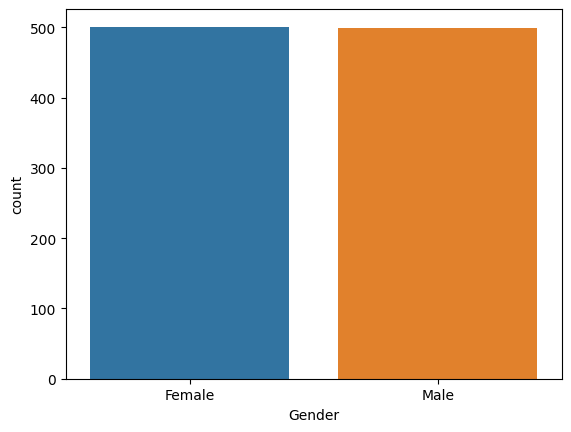

In [13]:
sns.countplot(data=df,x='Gender')

In [14]:
gender_dummies = pd.get_dummies(df['Gender'],dtype= 'int')
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [15]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


<Axes: xlabel='Product line', ylabel='Female'>

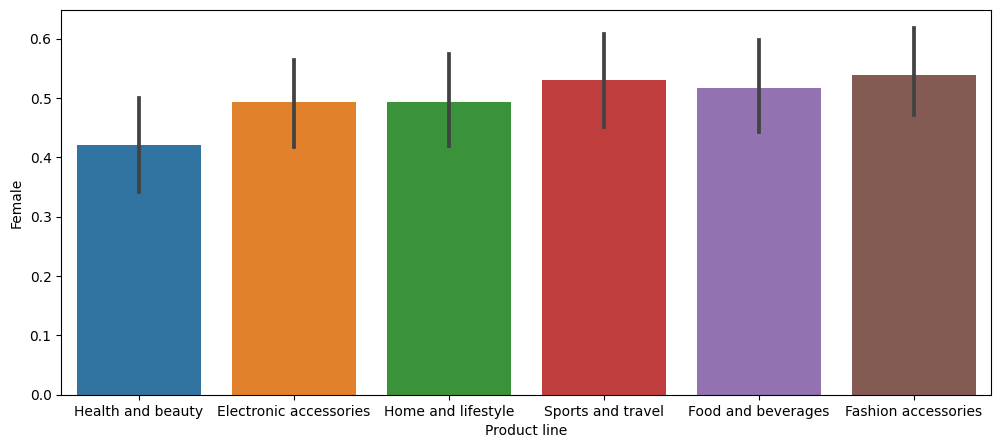

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Product line',y='Female')

<Axes: xlabel='Product line', ylabel='Male'>

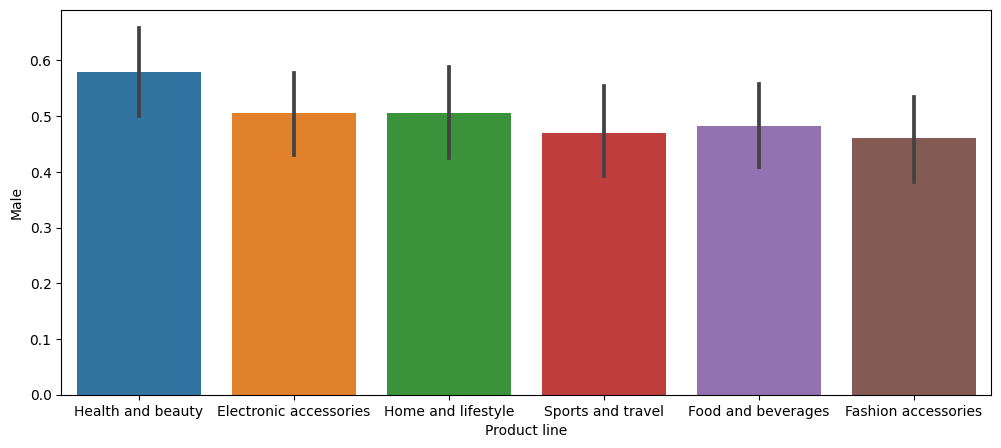

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Product line',y='Male')

In [18]:
# Plotting customers per city
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


<Axes: xlabel='City', ylabel='count'>

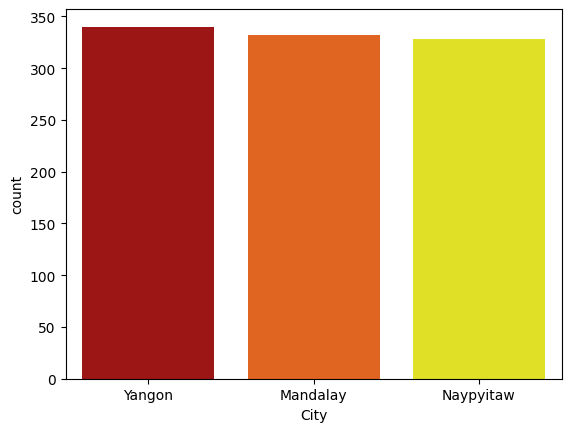

In [19]:
sns.barplot(data=place_df,x = place_df.index, y=place_df['count'], palette='hot')

In [20]:
# Plotting different payment methods count
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


<Axes: xlabel='Payment', ylabel='count'>

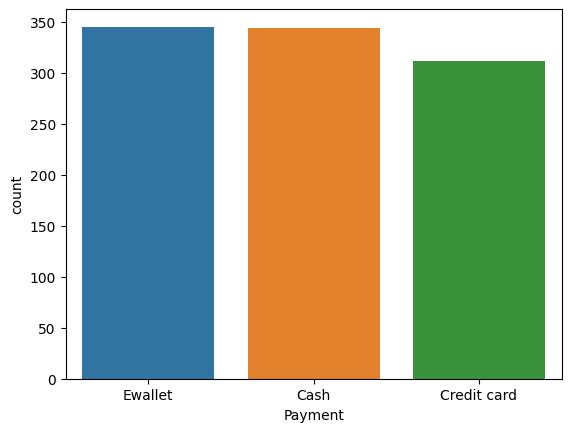

In [21]:
sns.barplot(data=payment_df, x=payment_df.index, y=payment_df['count'])

<Axes: xlabel='Product line', ylabel='gross income'>

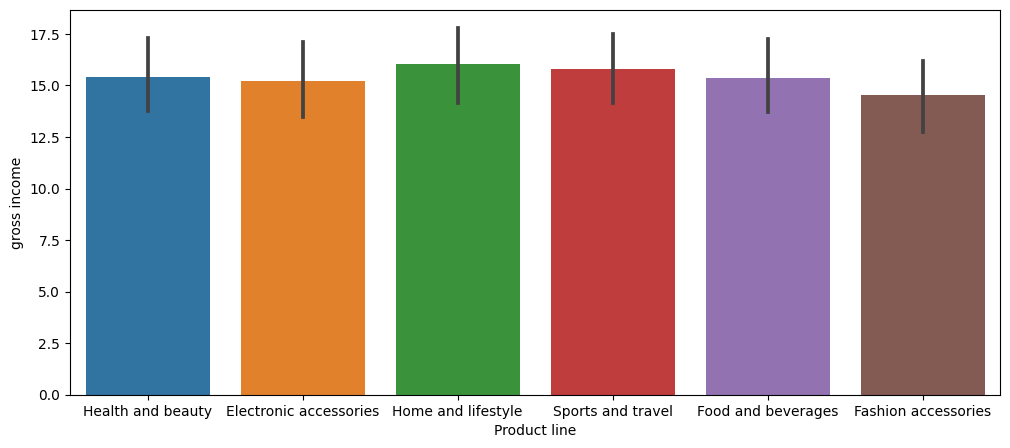

In [22]:
# Gross Income plot for each product line
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Product line', y='gross income')

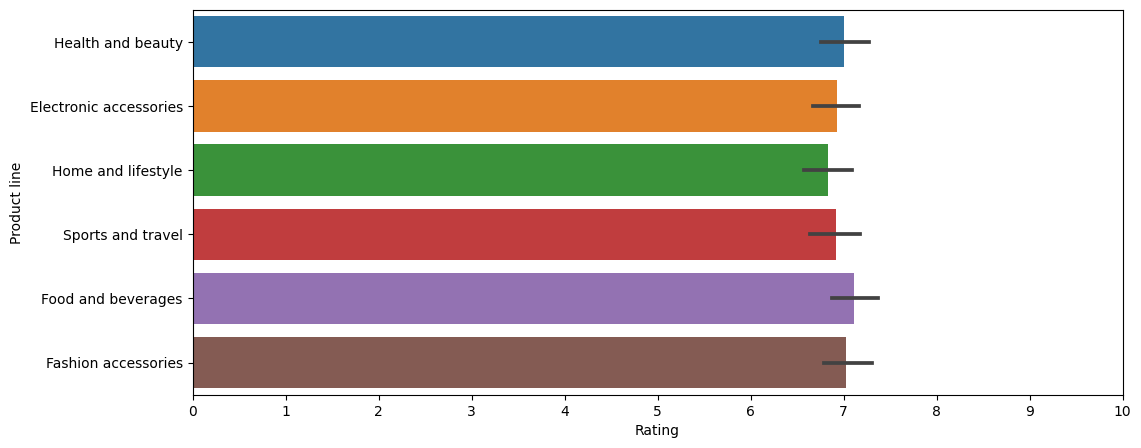

In [23]:
# Rating Plot for each product line
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Rating', y='Product line',)
# plt.xlim(0,10) Or
plt.xticks(xdata)
plt.show()

<Axes: xlabel='Product line', ylabel='Total'>

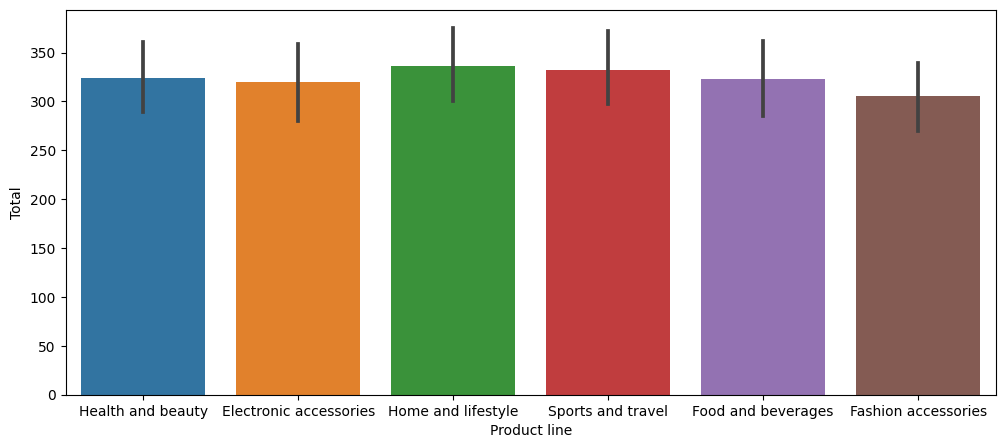

In [24]:
# Total bill in each product line
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Product line', y='Total')

/tmp/ipykernel_19/1986649851.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


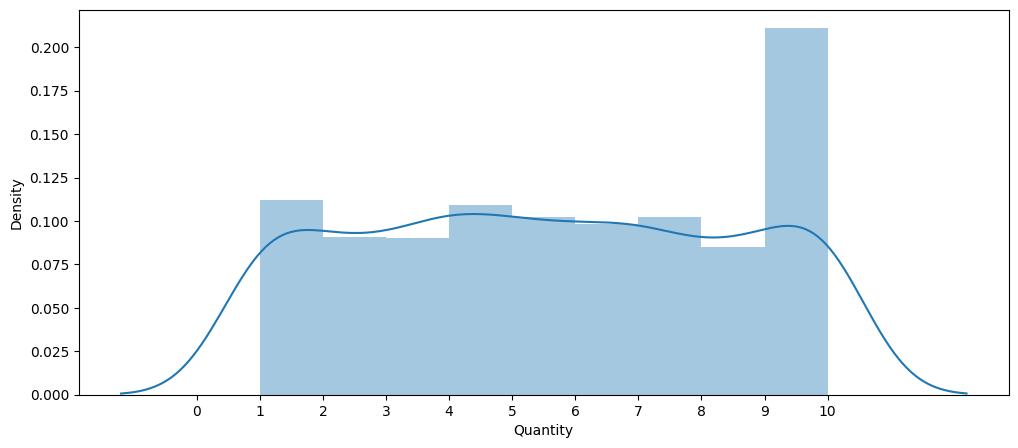

In [25]:
#Exploring Quantity column
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,5))
sns.distplot(df['Quantity'])
plt.xticks(xdata)
plt.show()

In [26]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90


<Axes: xlabel='Quantity', ylabel='count'>

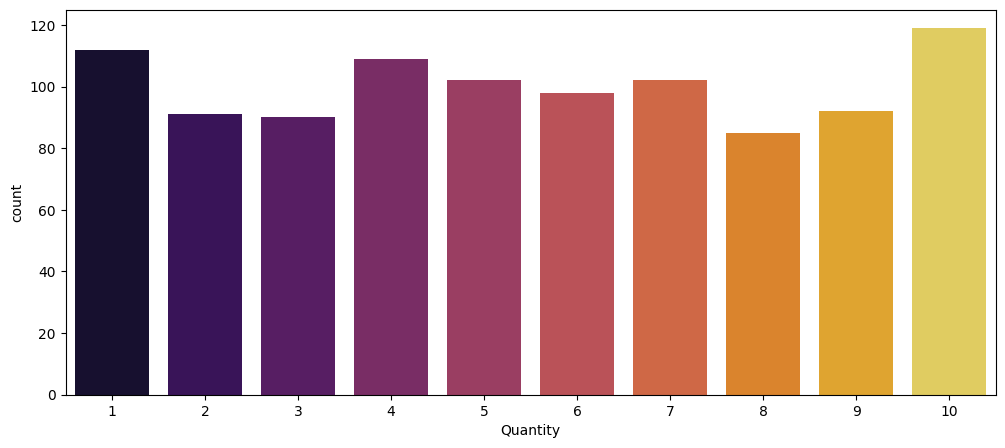

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(data=quantity_df,x=quantity_df.index,y='count',palette='inferno')

<Axes: >

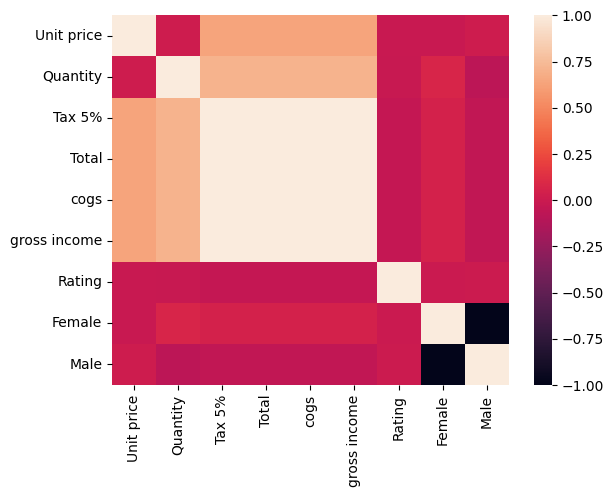

In [28]:
# checking if there is any correalation between columns
sns.heatmap(df.corr(numeric_only=True))

## What did we learnt from this analysis

####  1.Total Customers = 1000
####  2.Total Females = 501
####  3.Total Males = 499
####  4.Min Rating = 4
####  5.Max Rating = 10
####  6.Average rating = 6.97
####  7.Best Average rating --> Food & Beverages
####  8.Max Average Gross Income --> Home & Lifestyle
####  9.Min Average Gross Income --> Fashion Accessories
#### 10.Maxium buy quantity --> 10
#### 11.Max Average total bill --> Home & Lifestlye
#### 12.Min Average total bill --> Fashion Accessories
#### 13.Maximum people pays through E-Wallet
#### 14.Maxium people comes from Yangon City
#### 15.Max Average sales of Fashion Acessories is from females
#### 16.Max Average sales of Health & Beauty is from Males